In [14]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_json('test.json')

In [38]:
def convert_price_to_numbers(x: str):
    if x == 'prezzo riservato':
        return np.NaN
    return np.float(x[:-2].replace('.',''))

In [47]:
df['€'] = df['price'].apply(convert_price_to_numbers)
df['mq'] = df['surface'].apply(convert_surface_to_numbers)

In [46]:
def convert_surface_to_numbers(x: str):
    if x == 'm² n.d.':
        return np.NaN
    return np.float(x[3:])

In [48]:
df

,price,surface,€,mq
0,124.000 €,m² 74,124000.0,74.0
1,188.000 €,m² 100,188000.0,100.0
2,198.000 €,m² 95,198000.0,95.0
3,108.000 €,m² 71,108000.0,71.0
4,353.000 €,m² 120,353000.0,120.0
...,...,...,...,...
2953,649.000 €,m² 175,649000.0,175.0
2954,118.000 €,m² 131,118000.0,131.0
2955,275.000 €,m² 100,275000.0,100.0
2956,580.000 €,m² 135,580000.0,135.0


In [49]:
df['€/mq'] = df['€']/df['mq']

In [72]:
df['€/mq'].mean()

2225.6000460434525

In [78]:
df['€/mq'].std()

793.3369540017952

In [64]:
df['€/mq'].max()

6052.631578947368

In [69]:
df['€/mq'].min()

266.5238095238095

In [61]:
df = df.dropna()

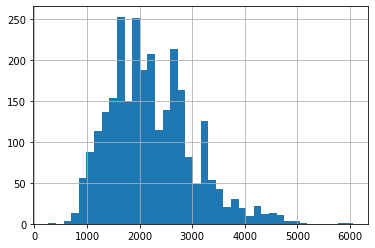

In [77]:
pd.plotting.hist_series(df['€/mq'], bins=40)

In [80]:
import matplotlib.pyplot as plt

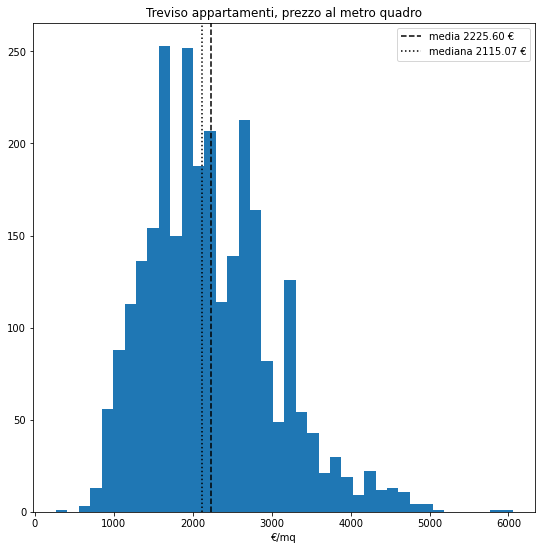

In [94]:
plt.figure(figsize=(9, 9))
plt.hist(df['€/mq'], bins=40)
plt.title('Treviso appartamenti, prezzo al metro quadro')
plt.xlabel('€/mq')
plt.axvline(df['€/mq'].mean(), color='black', linestyle='dashed', label="media {:04.2f} €".format(df['€/mq'].mean()))
plt.axvline(df['€/mq'].median(), color='black', linestyle='dotted', label="mediana {:04.2f} €".format(df['€/mq'].median()))
plt.legend()
plt.savefig('prezzi.png')
plt.show()

In [101]:
df['€/mq'].quantile([.05, .10, .25, .50])

0.05    1101.423368
0.10    1280.000000
0.25    1666.666667
0.50    2115.069357
Name: €/mq, dtype: float64